Okay, here is the post I promised would be coming ages ago: an introduction to Monte Carolo Markov Chains, or MCMC for short. It took a while for me to understand how MCMC models work from a pure theoretical standpoint, not to mention the task of representing and visualizing it via code. To add a bit more to the excuse, I did dabble in some other topics recently, such as machine learning models or information theory, which is also partially why this post was delayed quite a bit. Nevertheless, it's finally here and ready to go. In this post, we will take a look at the Metropolis-Hastings algorithm, the simplest variant among the family of MCMC models. Let's see what the Bayesian hype is all about.

# Refresher on Bayesian Analysis

It's been a while since we last talked about Bayesian inference, so it's probably a good idea to start with a brief recap. Bayesian statistics commences from Bayes' theorem, a seminal statement 

# Implementation in Python

Now that we have a basic understanding of how Markov Chain Monte Carlo, specifically Metropolis-Hastings works, let's implement the MCMC sampler in Python. As per convention, presented below are the dependencies required for this demonstration.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('darkgrid')
np.random.seed(123)

Generation of dummy data

In [2]:
data = np.random.randn(20)
data

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ])

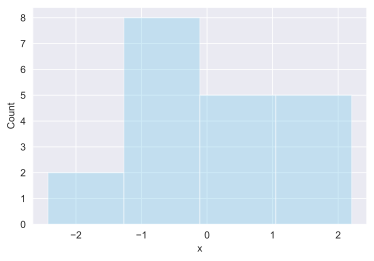

In [3]:
ax = plt.subplot()
sns.distplot(data, kde=False, ax=ax, color="skyblue")
_ = ax.set(xlabel='x', ylabel='Count')

In [4]:
def normal_posterior(data, x, mu_prior, sigma_prior, sigma=1):
    n = len(data)
    sigma_posterior = (1/sigma_prior**2 + n/sigma)**-1
    mu_posterior = sigma_posterior * (mu_prior/sigma_prior**2 + data.sum()/sigma**2)
    return norm(mu_posterior, np.sqrt(sigma_posterior)).pdf(x)

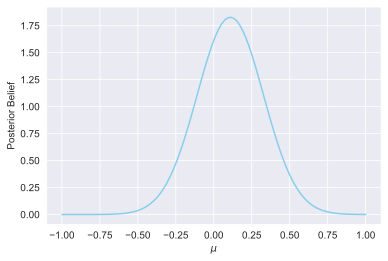

In [48]:
ax = plt.subplot()
x = np.linspace(-1, 1, 100)
posterior = normal_posterior(data, x, 0, 1)
ax.plot(x, posterior, color="skyblue")
ax.set(xlabel=r'$\mu$', ylabel='Posterior Belief')
sns.despine()
plt.show()

In [56]:
def sampler(data, iter_num, mu_init=.5, proposal_width=.5, mu_prior_mu=0, mu_prior_sd=1, sigma=1, plot=False):
    mu_current = mu_init
    posterior = [mu_current]
    reject_lst = []
    accept_lst = []
    for i in range(iter_num):
        mu_proposal = norm(mu_current, proposal_width).rvs()
        likelihood_current = np.prod(norm(mu_current, sigma).pdf(data))
        likelihood_proposal = np.prod(norm(mu_proposal, sigma).pdf(data))
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        accept = p_proposal/p_current > np.random.rand()
        if accept:
            mu_current = mu_proposal
            accept_lst.append(mu_current)
        else:
            reject_lst.append(mu_current)
        posterior.append(mu_current)
    return np.array(posterior)

In [57]:
sampler(data, 5)

array([ 0.5       ,  0.13332122, -0.05500916, -0.05500916, -0.05500916,
        0.14006248])

In [8]:
def plot_proposal(data, i, mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, accept, posterior):
    pass

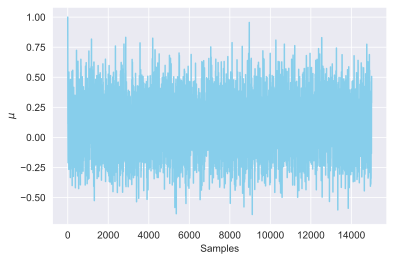

In [40]:
posterior = sampler(data, 15000, mu_init=1)
fig, ax = plt.subplots()
ax.plot(posterior, color="skyblue")
_ = ax.set(xlabel='Samples', ylabel=r'$\mu$')

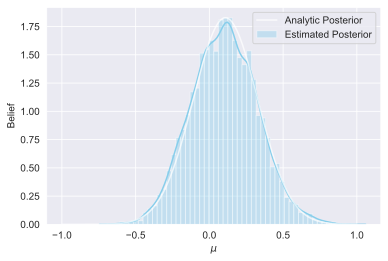

In [46]:
ax = plt.subplot()
sns.distplot(posterior[500:], ax=ax, label='Estimated Posterior', color='skyblue')
x = np.linspace(-1, 1, 500)
posterior_dist = normal_posterior(data, x, 0, 1)
ax.plot(x, posterior_dist, color='white', alpha=0.7, label='Analytic Posterior')
ax.set(xlabel=r'$\mu$', ylabel='Belief')
ax.legend()
plt.show()

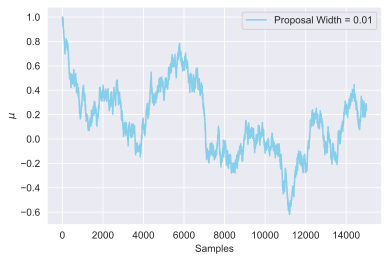

In [62]:
posterior_small = sampler(data, 15000, mu_init=1, proposal_width=.01)
fig, ax = plt.subplots()
ax.plot(posterior_small, color='skyblue', label='Proposal Width = 0.01')
_ = ax.set(xlabel='Samples', ylabel=r'$\mu$')
plt.legend()
plt.show()

...
https://twiecki.io/blog/2015/11/10/mcmc-sampling/
http://solarisailab.com/archives/2609